## Convert Raw Recorded to sequence of frames

- isolate single full rotation
- crop data
- save dat

### Inspecting the Raw Coded WFS Data

In [9]:
import scipy
import numpy as np

raw_opd_file = "../Debug Data/cell_4_ref_4_1th_opd.mat"
raw_opd = scipy.io.loadmat(raw_opd_file)
raw_opd = raw_opd['OPD']



raw_amp_file = "../Debug Data/cell_4_ref_4_1th_amp.mat"
raw_amp = scipy.io.loadmat(raw_amp_file)
raw_amp = raw_amp['amplitude']


In [18]:
### fix nan values
#raw_opd = np.nan_to_num(raw_opd, nan=1.0)
#raw_amp = np.nan_to_num(raw_amp, nan=1.0)
nan_indicies = np.unique(np.where(np.isnan(raw_amp))[0])
print(f"Frames with NaN values: {nan_indicies}")
for idx in nan_indicies:
        raw_amp[idx] = (raw_amp[idx-1] + raw_amp[idx+1]) / 2.0


### Crop Data
crop_opd = raw_opd[:, 140:390, 27:277]
crop_amp = raw_amp[:, 140:390, 27:277]

### Sigle Rotation Data
single_rot_opd = crop_opd[1172:1698]
single_rot_amp = crop_amp[1172:1698]


# Temporal Blurring
#temp_blur_opd = scipy.ndimage.gaussian_filter(crop_opd, 5, axes=0)
#temp_blur_amp = scipy.ndimage.gaussian_filter(crop_amp, 5, axes=0)




Frames with NaN values: []


### Save New Dataset

In [19]:
data_file = "../../Data/Raw Data/HEK Cells/Recorded Frames/raw_coded_wfs.mat"

data = {
    "amp": single_rot_amp,
    "opd": single_rot_opd,
    "opd_units": "um",
    "px_size": 3.e-06,
}

scipy.io.savemat(data_file, data)

### Visualize Data

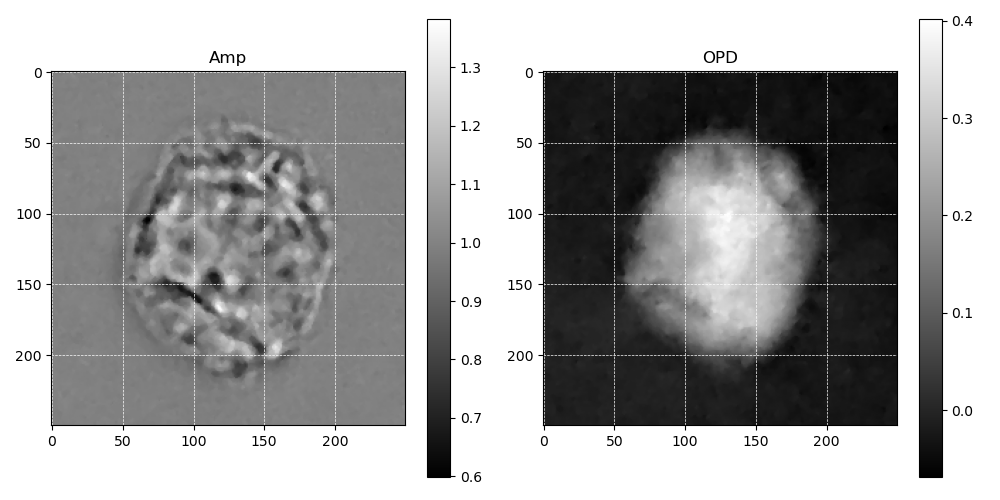

In [16]:
import matplotlib.pyplot as plt
import os
import sys
notebook_dir = os.getcwd()  # Aux/temptest
root_path = os.path.abspath(os.path.join(notebook_dir, ".."))
misc_path = os.path.join(root_path, "misc")
if misc_path not in sys.path:
    sys.path.append(misc_path)
from slice_visualizer import Slice_Visualizer


%matplotlib widget
plt.close('all')


vis_data = [single_rot_amp, single_rot_opd] 
titles = ["Amp", "OPD"]

visualizer = Slice_Visualizer(cmap="gray", ncols=2, grid=True)
visualizer.show(vis_data, titles=titles)



### Find Full rotations

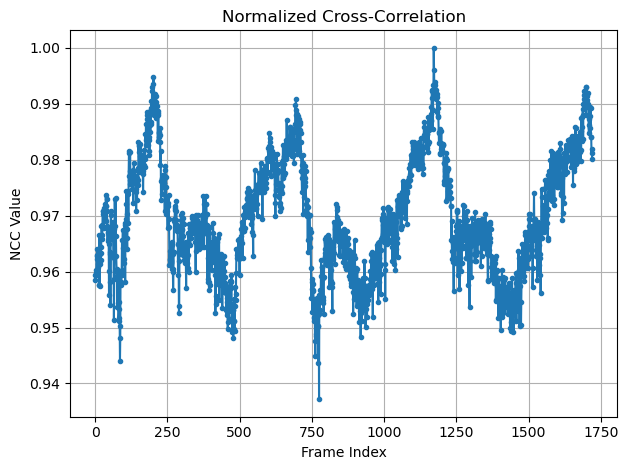

Top NCC indexes: [1172 1173  202 1177  201 1171 1176 1700  197 1698 1174 1175 1180 1165
  198 1693 1694 1166 1695 1696 1179 1705 1704 1183  207  205 1692  203
 1697  209 1701  206 1170  208 1182 1178 1167 1181  695 1691 1702  200
  194  210 1186 1707 1690  693  211  215]


In [14]:
### Find Single Rotation
import numpy as np
import matplotlib.pyplot as plt

def ncc(frame1, frame2, eps=1e-8):

    # Ensure tensors are float
    frame1 = frame1.astype(np.float32)
    frame2 = frame2.astype(np.float32)

    # Flatten tensors
    f1_flat = frame1.ravel()
    f2_flat = frame2.ravel()

    # Subtract mean
    f1_mean = f1_flat.mean()
    f2_mean = f2_flat.mean()
    f1_norm = f1_flat - f1_mean
    f2_norm = f2_flat - f2_mean

    # Compute NCC
    numerator = (f1_norm * f2_norm).sum()
    denominator = np.sqrt((f1_norm ** 2).sum() * (f2_norm ** 2).sum() + eps)

    ncc_value = numerator / denominator
    return ncc_value
    
    


# Compute NCC between the first frame and all other frames
# 1172

data = crop_opd

ref_idx = 1172
ref_frame = data[ref_idx]


ncc_values = []
for frame in data:
    ncc_value = ncc(ref_frame, frame)

    if np.isnan(ncc_value):
        ncc_value = -1.0
    ncc_values.append(ncc_value)




# Plot NCC values
x = np.arange(len(raw_amp))
ncc_values = np.array(ncc_values)



plt.close('all')
%matplotlib inline
plt.plot(x, ncc_values, marker='.')
plt.title('Normalized Cross-Correlation')
plt.xlabel('Frame Index')
plt.ylabel('NCC Value')
plt.grid(True)

plt.tight_layout()
plt.show()


# Identify top N peaks in NCC values
top_n = 50
max_ncc_idx = np.argsort(ncc_values)[-top_n:][::-1]
print("Top NCC indexes:", max_ncc_idx)
#max_ncc_idx = np.sort(max_ncc_idx)
#print("Corresponding NCC values:", ncc_values[max_ncc_idx])



### Figure out data errors

In [6]:
# Frames with Nan values
nan_indexes = np.argsort(ncc_values)[:7] # 7 frames based on plot
print("Frame Idx with NaN values ", nan_indexes)

NameError: name 'ncc_values' is not defined

In [ ]:
data = raw_amp[1503]

print(f"Max val: {data.max()}, Min val: {data.min()}")
print(f"Number of NaN values: {np.isnan(data).sum()}")
print(f"Coords of NaN values: {np.where(np.isnan(data))}")



Max val: 29.83885901831467, Min val: 0.4322122173905894
Number of NaN values: 0
Coords of NaN values: (array([], dtype=int64), array([], dtype=int64))


In [7]:

plt.close('all')
%matplotlib inline
plt.imshow(data, cmap='gray')
plt.show()

NameError: name 'data' is not defined